In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def prediction(theta_0, theta_1, x):
    return theta_0 + theta_1*x

In [37]:
def prediction_difference(theta_0, theta_1, x, y):
    return prediction(theta_0, theta_1, x) - y

In [38]:
def gradient_descent(theta_0, theta_1, x, y, num_iterations, alpha):
    m = len(x)
    cost_list = []

    for i in range(num_iterations):
        error = prediction_difference(theta_0, theta_1, x, y)
        cost = (error@error) / (2*m)
        cost_list.append(cost)

        theta_0 = theta_0 - alpha*error.mean()
        theta_1 = theta_1 - alpha*(error*x).mean()

        if i % 10 == 0:
            plt.scatter(house_size, house_price)
            plt.plot(house_size, prediction(theta_0, theta_1, x), color='red')
            plt.show()

    return theta_0, theta_1, cost_list

In [39]:
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# theta 값들 초기화 (아무 값이나 시작함)
th_0 = 2.5
th_1 = 0

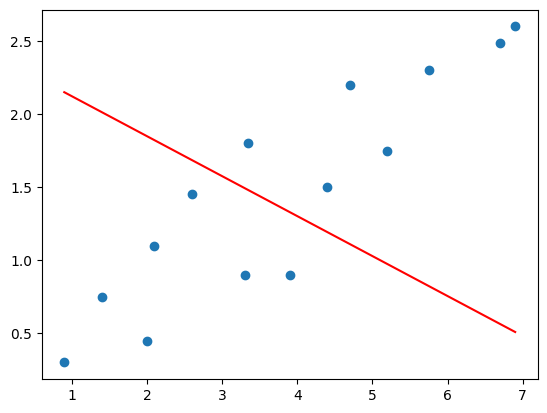

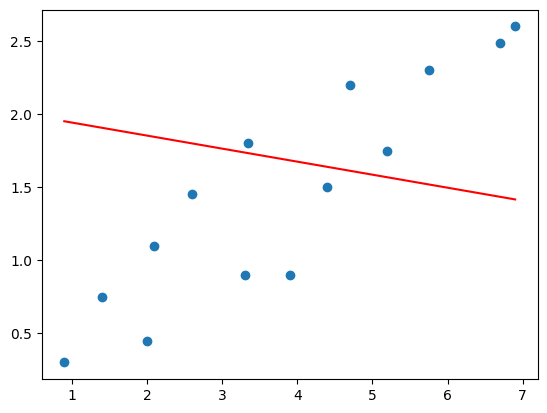

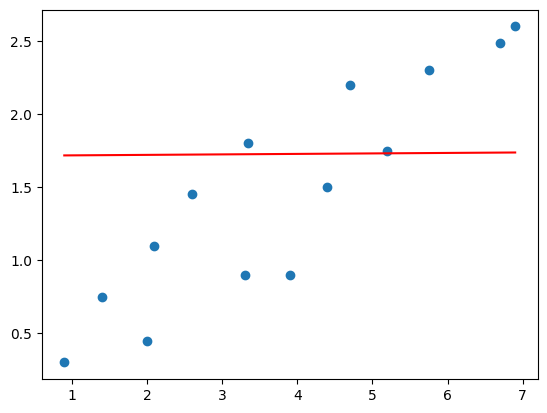

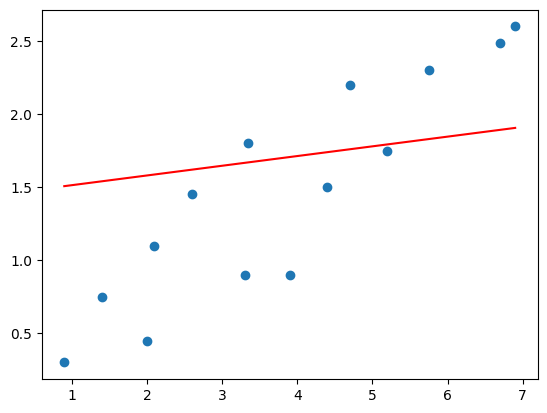

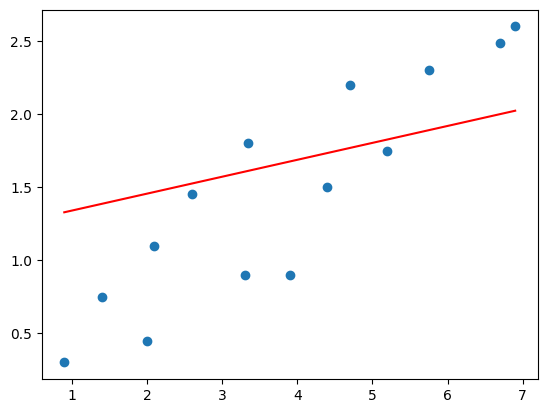

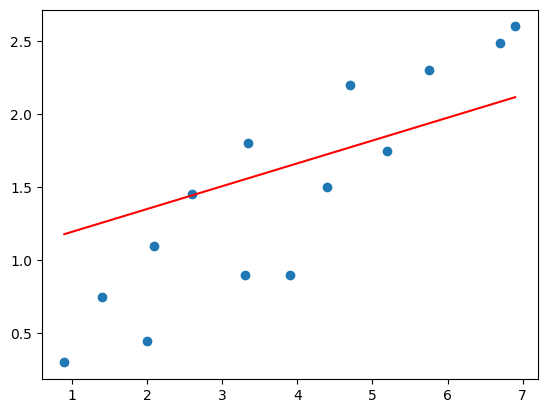

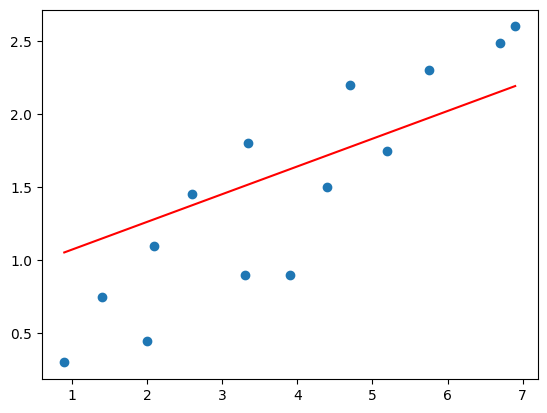

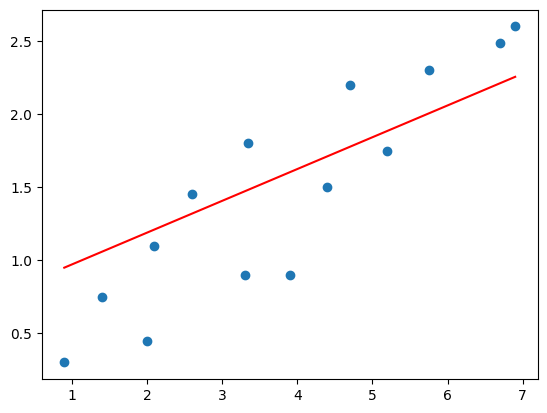

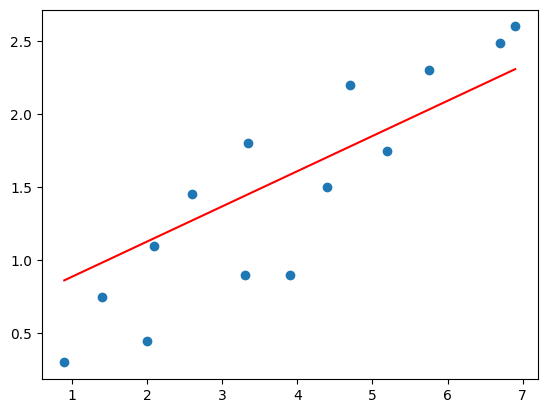

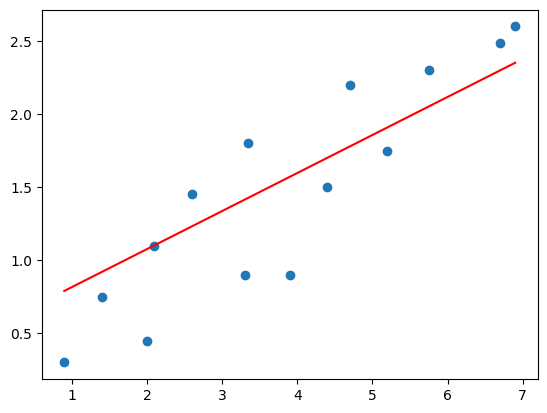

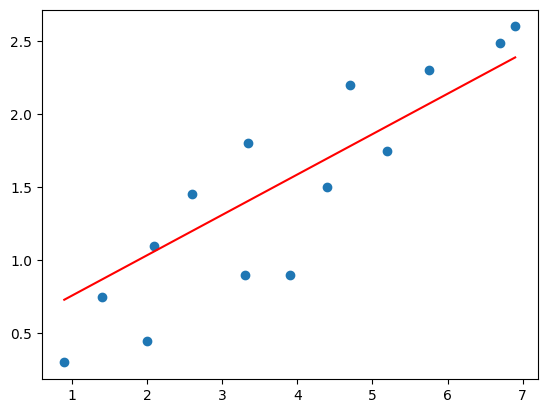

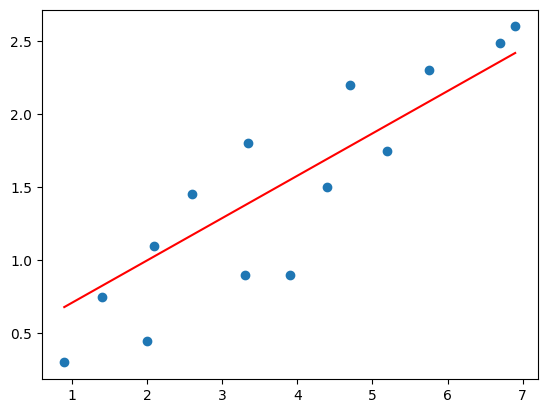

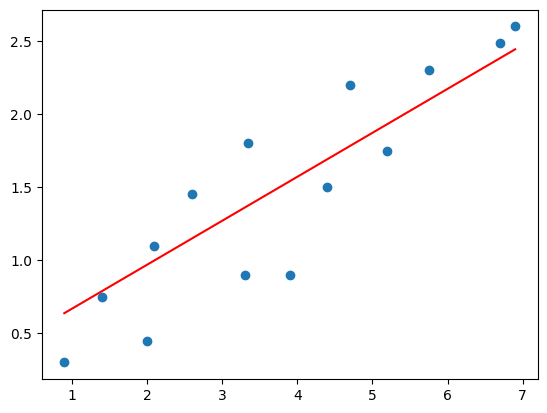

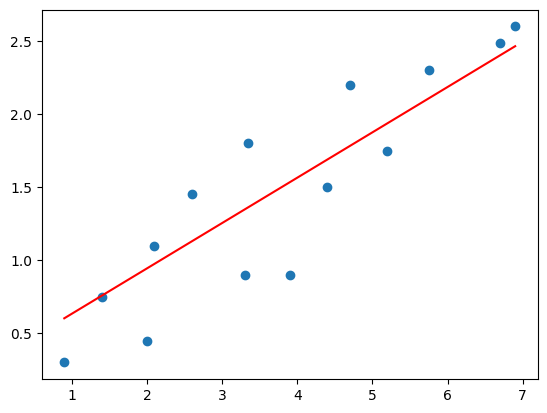

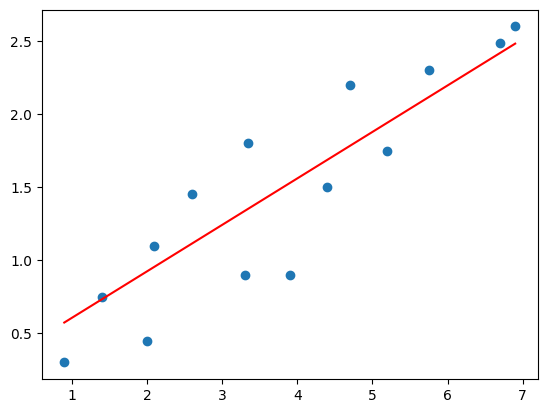

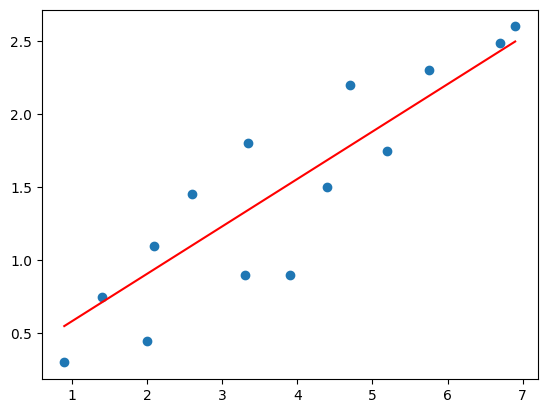

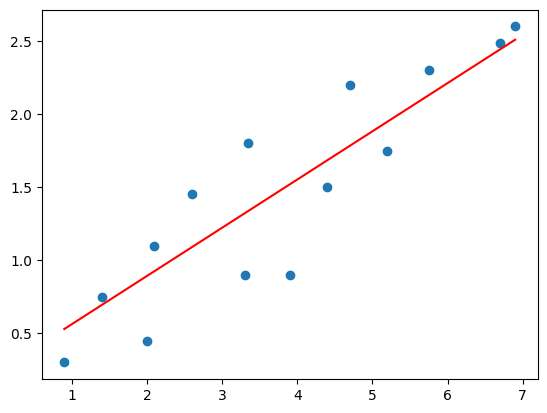

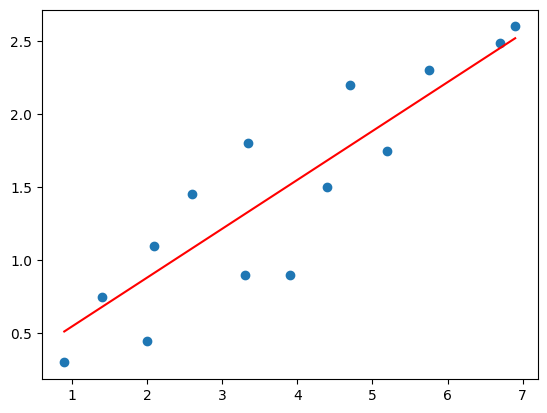

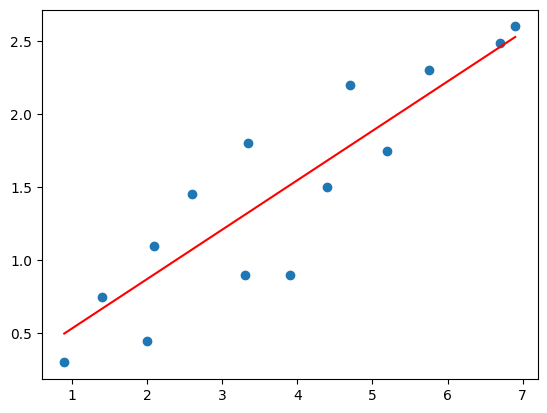

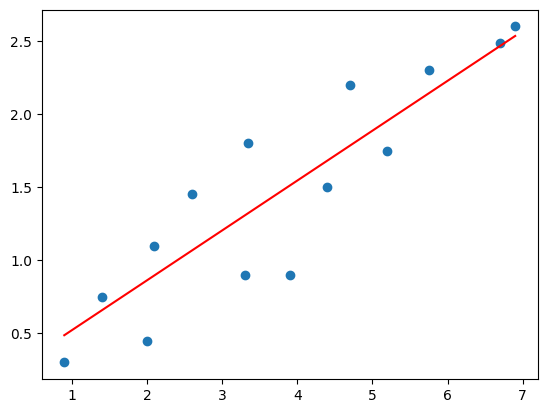

In [40]:
th_0, th_1, cost_list = gradient_descent(th_0, th_1, house_size, house_price, 200, 0.1)

In [41]:
print(th_0, th_1)

0.16821801417752186 0.3438032402351199


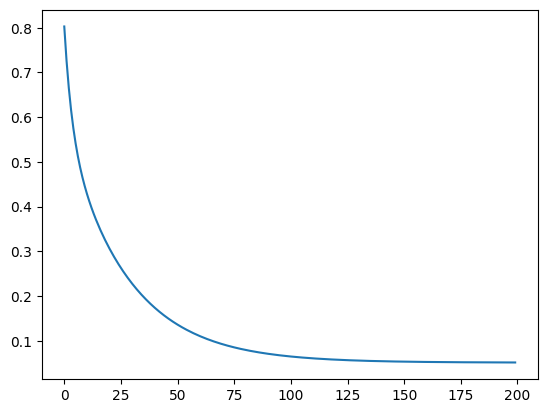

In [42]:
plt.plot(cost_list)

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
import pandas as pd

boston_df = pd.read_csv('/content/drive/MyDrive/study/data/boston.csv')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [49]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [50]:
x = boston_df.drop(columns='MEDV')
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [51]:
x = x[['AGE']]
x

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
...,...
501,69.1
502,76.7
503,91.0
504,89.3


In [52]:
y = boston_df[['MEDV']]
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [58]:
model.fit(x_train, y_train)

LinearRegression()

In [59]:
# theta1의 값이 나온다.
model.coef_

array([[-0.12402883]])

In [60]:
# theta0의 값이 나온다.
model.intercept_

array([31.04617413])

In [61]:
# f(x) = 31.04617413 -0.12402883x

In [63]:
# test에 대한 예측값
y_test_prediction = model.predict(x_test)
y_test_prediction

array([[20.31768041],
       [28.14389953],
       [22.84786852],
       [18.64329122],
       [24.62148078],
       [19.99520545],
       [19.75955068],
       [22.79825699],
       [20.92542167],
       [21.74401194],
       [23.29437231],
       [25.41526529],
       [21.53316293],
       [25.94858925],
       [23.76568186],
       [24.55946636],
       [18.64329122],
       [18.64329122],
       [22.00447248],
       [18.64329122],
       [18.89134887],
       [18.90375176],
       [21.33471681],
       [22.71143681],
       [28.46637448],
       [19.06498923],
       [24.31140871],
       [22.05408402],
       [26.32067574],
       [26.59353916],
       [19.0153777 ],
       [18.85414022],
       [19.30064401],
       [18.7301114 ],
       [28.76404367],
       [18.92855752],
       [21.5579687 ],
       [19.21382383],
       [19.69753626],
       [29.08651863],
       [19.56110455],
       [18.64329122],
       [21.02464473],
       [20.14404005],
       [24.72070384],
       [25

In [64]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_test_prediction) ** 0.5

8.236881612652455